In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [3]:
ecc_norm = 'l1'
with open(f'results.3d/ecc_quantiles_{ecc_norm}.pickle', 'rb') as f:
    data = pickle.load(f)

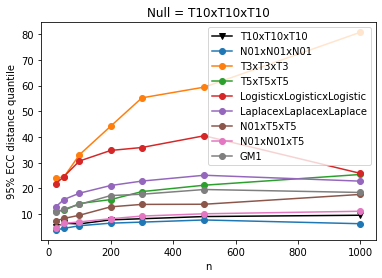

In [55]:
Ns = list(data.keys())
N = Ns[0]

n_cols = 3
n_rows = np.ceil(len(data[N].keys()) / n_cols)



true_distribs = list(data[N].keys())

true_distrib = true_distribs[3]
# first plot the quantiles when alter_distrib == true_distrib
ys = []
for N in Ns:
    ys.append(data[N][true_distrib][true_distrib])
plt.plot(Ns, ys, 'v-', label=true_distrib, color='black')
for alter_distrib in data[N][true_distrib].keys():
        if alter_distrib != true_distrib:
            ys = []
            for N in Ns:
                ys.append(data[N][true_distrib][alter_distrib])
            plt.plot(Ns, ys, 'o-', label=alter_distrib)
plt.title(f'Null = {true_distrib}')
plt.legend()
plt.xlabel('n')
plt.ylabel('95% ECC distance quantile')
plt.show()

In [ ]:
# convergence

In [187]:
ecc_norm = 'sup'
N=500
with open(f'results.3d/ecc_convergence_{ecc_norm}_N={N}_scaling.pickle', 'rb') as f:
    data = pickle.load(f)
# with open(f'results.3d/mg_convergence_N={N}.pickle', 'rb') as f:
#     data = pickle.load(f)

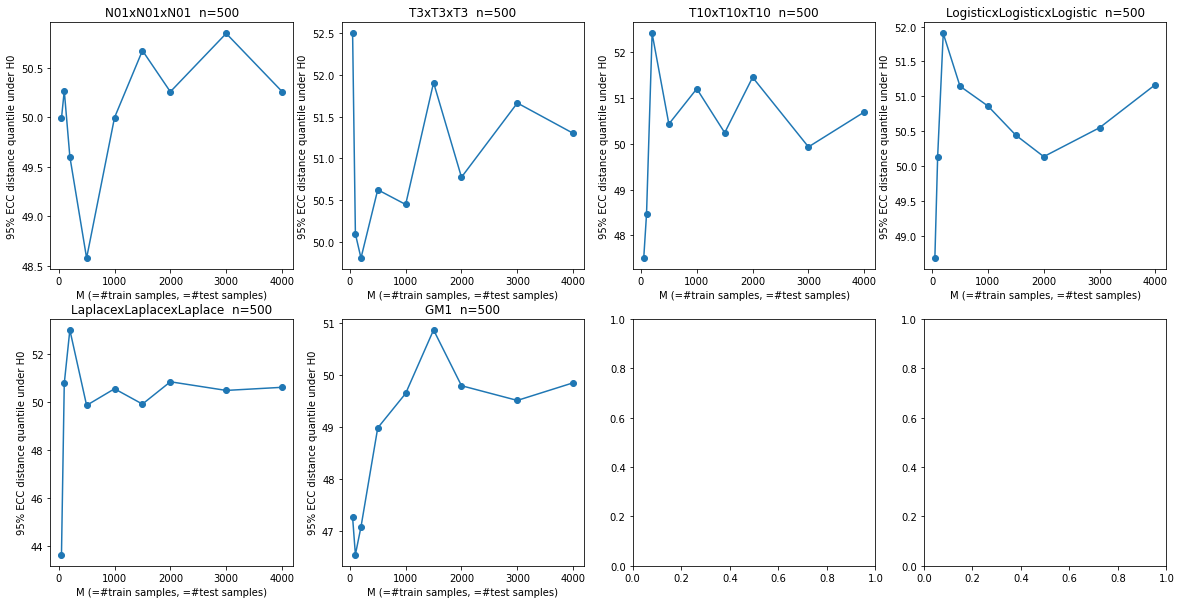

In [188]:
Ms = list(data.keys())
M0 = Ms[0]


n_cols = 4
n_rows = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,10))


for n_plot, true_distrib in enumerate(data[M0].keys()):
    n_col = n_plot % n_cols
    n_row = int(np.floor(n_plot / n_cols))
    ys = []
    for M in Ms:
        ys.append(data[M][true_distrib][true_distrib])
    axs[n_row, n_col].plot(Ms, ys, 'o-')
    axs[n_row, n_col].set_title(f'{true_distrib}  n={N}')
    axs[n_row, n_col].set_xlabel('M (=#train samples, =#test samples)')
    axs[n_row, n_col].set_ylabel('95% ECC distance quantile under H0')
    # plt.plot(Ms, ys, 'o-')
    # plt.title(f'{true_distrib}  n={N}')
    # print(f'{true_distrib} {ys[-1]}')
    # plt.xlabel('M (=#MC loops, =#train samples, =#test samples)')
    # plt.ylabel('95% ECC distance quantile under H0')
    # plt.show()

In [2]:
def get_mean_power(df):
    mean_power = []
    for row_id, row in df.iterrows():
        if row.true_distrib != row.alter_distrib:
            mean_power.append(1-row.topo_mean)
    mean_power = np.mean(mean_power)
    return mean_power

In [11]:
def make_convergece_plot(n, ecc_norm='sup'):
    Ms = [50, 100, 200, 300, 500, 750, 1000, 1500, 2000, 3000, 5000]
    ms = Ms
    out = np.zeros((len(Ms), len(Ms)))
    for M_id, M in enumerate(Ms):
        for m_id, m in enumerate(ms):
            try:
                df = pd.read_csv(f'results.5d_convergence/ecc_{ecc_norm}_n={n}_M={M}_m={m}.csv') 
                out[M_id, m_id] = get_mean_power(df)
            except:
                print(f'Missing file n={n} M={M} m={m}')
                out[M_id, m_id] = np.nan
    return out

In [ ]:
make_convergece_plot(n=200)

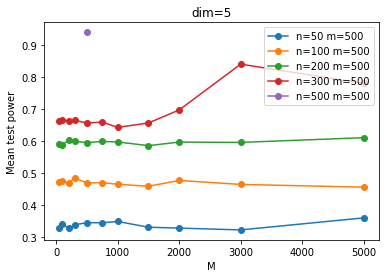

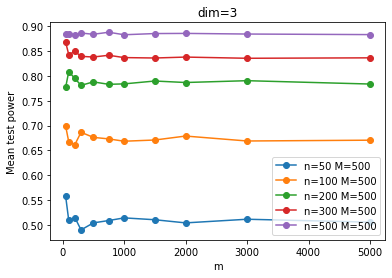

In [20]:
ecc_norm = 'sup'
ns = [50, 100, 200, 300, 500]
Ms = [50, 100, 200, 300, 500, 750, 1000, 1500, 2000, 3000, 5000]
ms = Ms

m=500
for n in ns:
    powers = []
    true_M = []
    for M in Ms:
        try:
            df = pd.read_csv(f'results.5d_convergence/ecc_{ecc_norm}_n={n}_M={M}_m={m}.csv')
            powers.append(get_mean_power(df))
            true_M.append(M)
        except:
            pass
    plt.plot(true_M, powers, 'o-', label=f'n={n} m={m}')
plt.xlabel('M')
plt.ylabel('Mean test power')
plt.title('dim=5')
plt.legend()
plt.show()

M = 500
for n in ns:
    powers = []
    for m in ms:
        df = pd.read_csv(f'results.3d_convergence/ecc_{ecc_norm}_n={n}_M={M}_m={m}.csv')
        powers.append(get_mean_power(df))
    plt.plot(ms, powers, 'o-', label=f'n={n} M={M}')
plt.xlabel('m')
plt.ylabel('Mean test power')
plt.title('dim=3')
plt.legend()

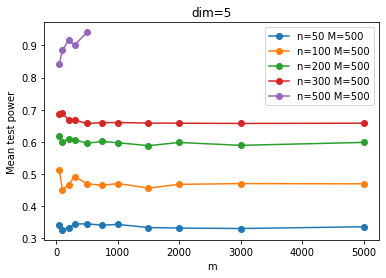

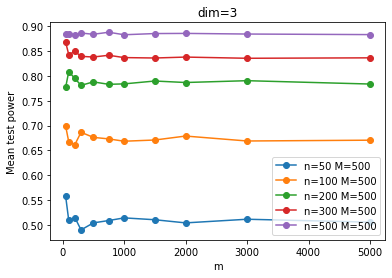

In [21]:
ecc_norm = 'sup'
ns = [50, 100, 200, 300, 500]
Ms = [50, 100, 200, 300, 500, 750, 1000, 1500, 2000, 3000, 5000]
ms = Ms

M=500
for n in ns:
    powers = []
    true_m = []
    for m in ms:
        try:
            df = pd.read_csv(f'results.5d_convergence/ecc_{ecc_norm}_n={n}_M={M}_m={m}.csv')
            powers.append(get_mean_power(df))
            true_m.append(m)
        except:
            pass
    plt.plot(true_m, powers, 'o-', label=f'n={n} M={M}')
plt.xlabel('m')
plt.ylabel('Mean test power')
plt.title('dim=5')
plt.legend()
plt.show()

M = 500
for n in ns:
    powers = []
    for m in ms:
        df = pd.read_csv(f'results.3d_convergence/ecc_{ecc_norm}_n={n}_M={M}_m={m}.csv')
        powers.append(get_mean_power(df))
    plt.plot(ms, powers, 'o-', label=f'n={n} M={M}')
plt.xlabel('m')
plt.ylabel('Mean test power')
plt.title('dim=3')
plt.legend()

In [112]:
from scipy.optimize import minimize

50 2.0 136.96898490773867
100 2.0 264.0421800283751
200 2.0 617.880276111123
300 2.0 922.1733468508914
500 2.0 1711.5129489692013


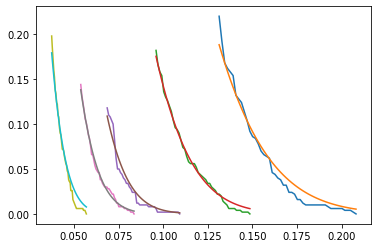

0.5201034805664505


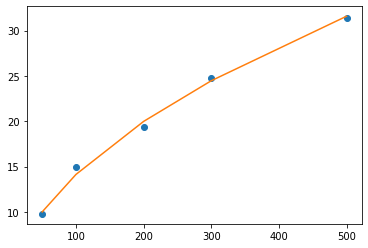

In [177]:
bs = []
ns = [50, 100, 200, 300, 500]
thres = []
alpha=0.05
for n in ns:
    dat = np.load(f'results.5d_convergence/ecc_sup_N={n}_N01xN01xN01xN01xN01_signature_distance_matrix.npy')
    #dat = np.load(f'results.5d_convergence/ecc_sup_N={n}_T10xT10xT10xT10xT10_signature_distance_matrix.npy')
    #dat = np.load(f'results.5d_convergence/ecc_sup_N={n}_T3xT3xT3xT3xT3_signature_distance_matrix.npy')
    #dat = np.load('results.5d_convergence/ecc_sup_N=100_N01xN01xN01xN01xN01-LapxLapxLapxLapxLap_distance_matrix.npy')
    dim = 5
    thres.append(np.quantile(dat/n**(1/dim), 1-alpha))
    #dat = dat/n
    #dat = dat/n**(1.0/4.0)
    dat = dat*n**(-5.0/4.0)
    d_min = np.min(dat)
    d_max = np.max(dat)
    eps = np.linspace(d_min, d_max, 100)
    prop_epi = [np.sum(dat>ep)/len(d) for ep in eps]
    #prop_th = np.exp(-2*eps**2/n**(1.0/dim))
    #plt.plot(eps, prop_epi)
    #plt.plot(eps, prop_th)

    def f_square(param):
        a = param[0]
        b = param[1]
        a = 2
        y = a*np.exp(-b*eps_large**2)
        return np.sum((prop_epi_large-y)**2)

    eps_large = eps[50:]
    prop_epi_large = prop_epi[50:]
    res = minimize(f_square, [2, 1])
    a = res.x[0]
    b = res.x[1]
    print(n, a, b)
#    a = 2
#    b = 3.0*np.sqrt(n)
    plt.plot(eps_large, prop_epi_large)
    plt.plot(eps_large, a*np.exp(-b*eps_large**2))
    bs.append(b)

ns = np.array(ns)
def f_thres(param):
    sigma = param[0]
    y = np.sqrt(-2*ns*np.log(alpha/2))*sigma
    return np.sum((thres-y)**2)

plt.show()
res = minimize(f_thres, [1])
sigma = res.x[0]
plt.plot(ns, thres, 'o')
plt.plot(ns, np.sqrt(-2*ns*np.log(alpha/2))*sigma)
print(sigma)

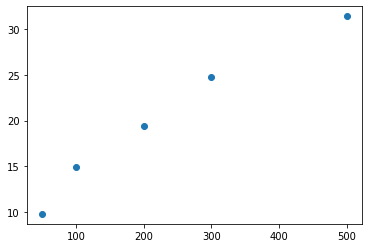

In [172]:
plt.plot(ns, thres, 'o')

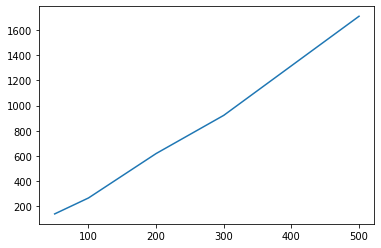

In [ ]:
plt.plot(ns, bs)

In [ ]:
np.array(bs)/np.array(ns)

array([2.73937967, 2.64042179, 3.08940138, 3.07391116, 3.423026  ])

In [161]:
dat = np.load(f'results.5d_convergence/ecc_sup_N={n}_N01xN01xN01xN01xN01_signature_distance_matrix.npy')